# Question 1

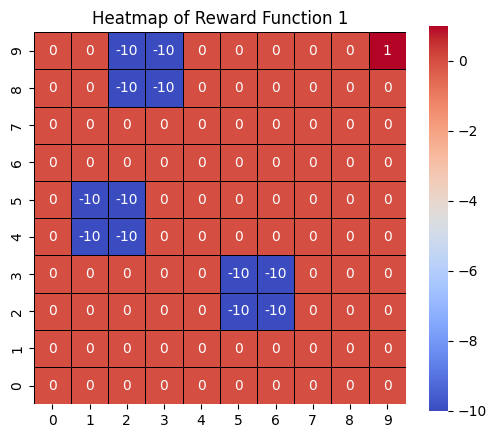

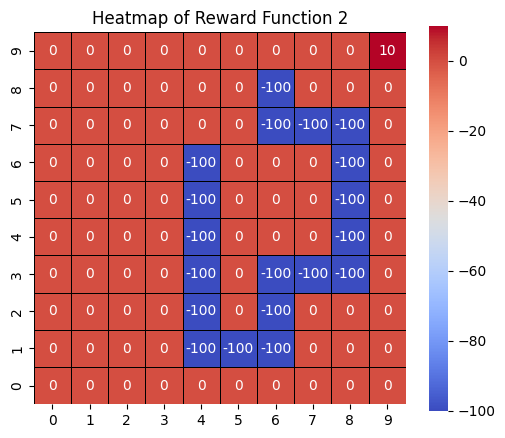

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Reward Function 1 (from Figure 6)
reward1 = np.zeros((10, 10))
reward1[2, 5] = -10
reward1[2, 6] = -10
reward1[3, 5] = -10
reward1[3, 6] = -10
reward1[4, 1] = -10
reward1[4, 2] = -10
reward1[5, 1] = -10
reward1[5, 2] = -10
reward1[8, 2] = -10
reward1[8, 3] = -10
reward1[9, 2] = -10
reward1[9, 3] = -10
reward1[9, 9] = 1

# Reward Function 2 (from Figure 7)
reward2 = np.zeros((10, 10))
coords2 = [
    (1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 6), (3, 7), (3, 8), (4, 4), (4, 8), (5, 4), (5, 8), (6, 4), (6, 8), (7, 6), (7, 7), (7, 8), (8, 6)
    ]
for r, c in coords2:
    reward2[r, c] = -100
reward2[9, 9] = 10

# Plotting function
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', square=True, cbar=True,
                     linewidths=0.5, linecolor='black', fmt=".0f")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Generate the heatmaps
plot_heatmap(reward1, "Heatmap of Reward Function 1")
plot_heatmap(reward2, "Heatmap of Reward Function 2")


# Question 2

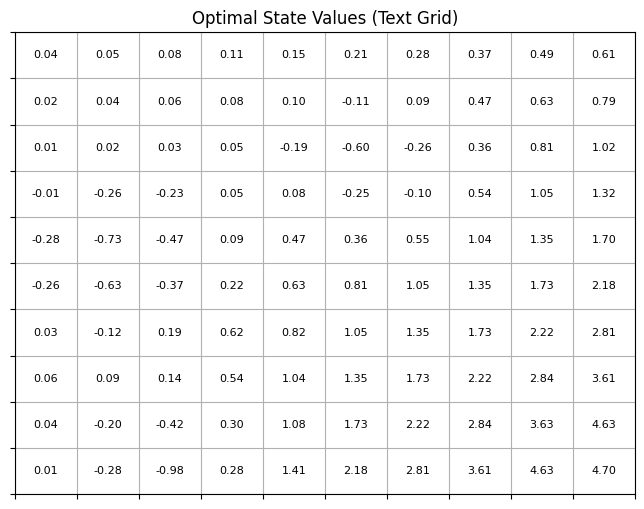

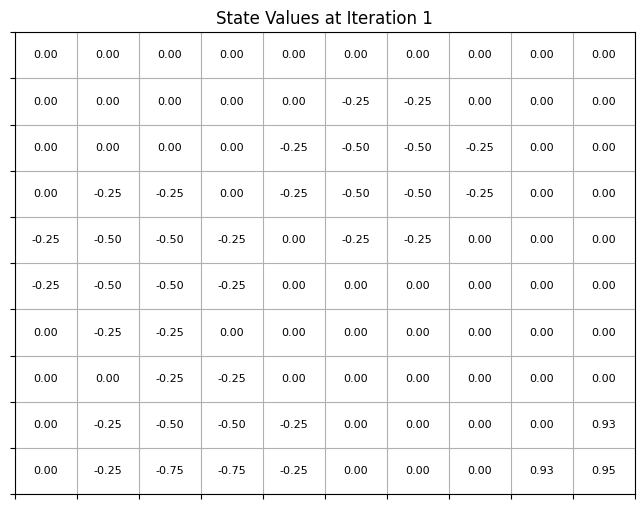

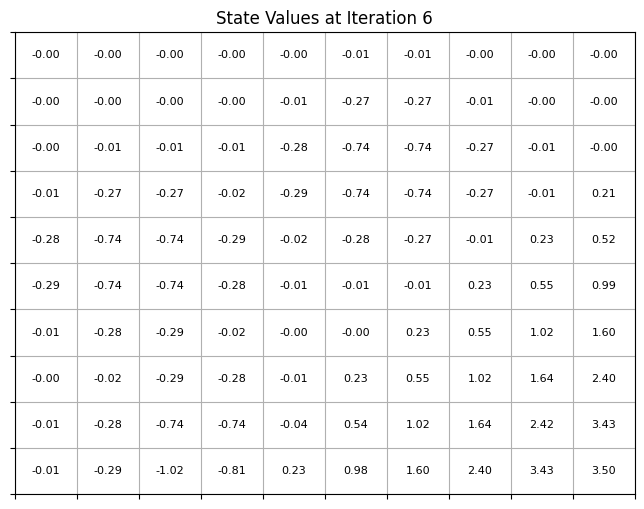

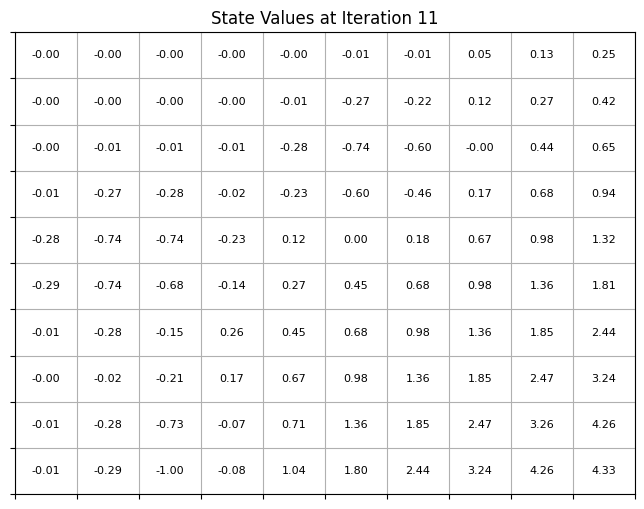

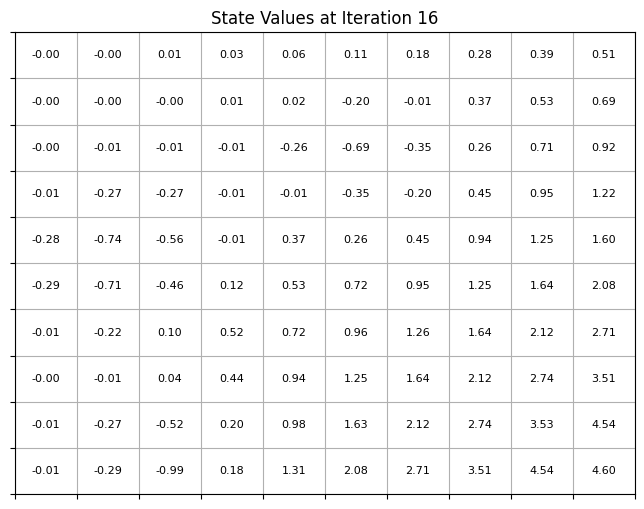

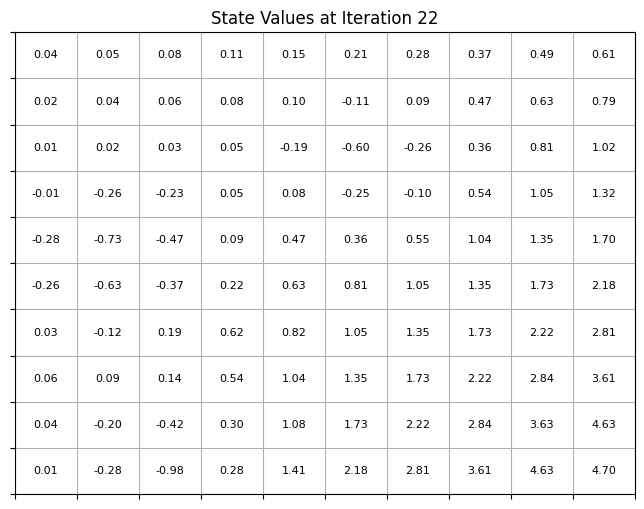


Value Iteration Converged in N = 22 iterations
Snapshots taken at iterations: [np.int64(1), np.int64(6), np.int64(11), np.int64(16), np.int64(22)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]

# Reward Function 1
reward_function = np.zeros(num_states)
reward_function[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function[99] = 1

# Transition Probability Matrix: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0
    snapshots = []
    # Linearly distributed steps from 1 to N (we'll determine N first, then select steps)
    all_values = []  # Store V at each iteration to select snapshots later

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1
        all_values.append(V.copy())

    N = iteration
    # Select 5 linearly distributed steps from 1 to N
    step_indices = np.linspace(0, N-1, 5, dtype=int)  # 0-based indices
    snapshot_iterations = [i + 1 for i in step_indices]  # Convert to 1-based iteration numbers
    snapshots = [all_values[i] for i in step_indices]

    return V, N, snapshots, snapshot_iterations

# Run Value Iteration
optimal_V, N, snapshots, snapshot_steps = value_iteration()

# Plot Text-Grid Only (no heatmap)
def plot_state_values_text(V, title):
    V_grid = V.reshape(grid_size, grid_size)
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j + 0.5, grid_size - 1 - i + 0.5, f'{V_grid[i, j]:.2f}',
                    ha='center', va='center', fontsize=8)
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.show()

# Final optimal state value plot
plot_state_values_text(optimal_V, 'Optimal State Values (Text Grid)')

# Snapshot plots at linearly distributed steps
for i, step in enumerate(snapshot_steps):
    plot_state_values_text(snapshots[i], f'State Values at Iteration {step}')

# Report
print(f"\nValue Iteration Converged in N = {N} iterations")
print(f"Snapshots taken at iterations: {snapshot_steps}")

The Value Iteration algorithm converges in N=22 iterations, and snapshots of state values are plotted at 5 linearly distributed steps: iterations 1, 6, 11, 16, and 22. Initially, at iteration 1, the state values reflect immediate rewards, with penalty states like state 25 at -0.50 and the goal state 99 at 0.95, while distant states remain near zero (e.g., state 0 at 0.00). By iteration 6, the penalty states deepen to -0.74 at state 25, and the goal state rises significantly to 3.50, with the reward influence spreading across the grid. At iteration 11, penalty states is still -0.74 at state 25, while state 99 reaches 4.33. 41, showing a stronger gradient towards the goal. By iteration 16, an unexpected trend emerges as penalty states become less negative (e.g., state 25 at -0.69), possibly due to the long-term influence of the goal state at 4.60. Finally, at iteration 22, this trend continues with state 25 at -0.60 and state 99 at 4.70, indicating that the agent's focus on reaching the goal may outweigh immediate penalties over time, revealing a nuanced convergence pattern influenced by the grid dynamics and discount factor.

# Question 3

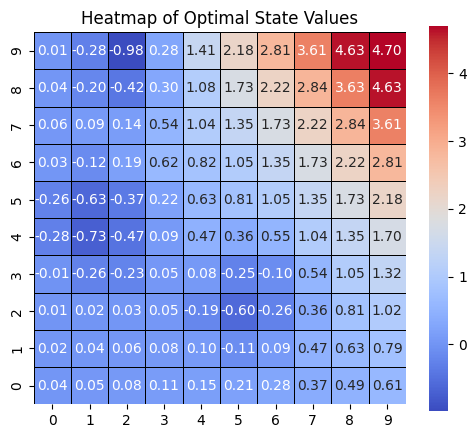

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming optimal_V is available from Question 2
# For context, let's include the necessary parts from Question 2 to ensure optimal_V is computed
# MDP Parameters
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]

# Reward Function 1
reward_function = np.zeros(num_states)
reward_function[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function[99] = 1

# Transition Probability Matrix: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm (from Question 2)
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute optimal state values
optimal_V = value_iteration()

# Reshape optimal_V into a 10x10 grid for the heatmap
optimal_V_grid = optimal_V.reshape(grid_size, grid_size)

# Plotting function (adapted from Question 1)
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', square=True, cbar=True,
                     linewidths=0.5, linecolor='black', fmt=".2f")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Generate the heatmap for optimal state values
plot_heatmap(optimal_V_grid, "Heatmap of Optimal State Values")

# Question 4

**Explanation of the Distribution of Optimal State Values**

The heat map of the optimal state values across the 2D grid reveals a distinct distribution that reflects the agent's learned strategy for navigating the environment, balancing the immediate penalties and the long-term goal. The grid shows a clear gradient, with the lowest values concentrated around the penalty states (e.g., states 25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93), where the reward is -10, such as state 25 at -0.60, depicted in deep blue shades indicating strong avoidance. In contrast, the highest value is at the goal state 99 (position (9, 9)), with V(99)=4.70, shown in a bright red shade, highlighting the agent's preference for reaching this state due to its positive reward of 1. Nearby states, such as state 89 and state 98 (4.63), also exhibit high positive values in red hues, reflecting the propagating influence of the goal state's reward. A smooth gradient emerges across the grid, with values increasing as states get closer to state 99 (e.g., state 0 in the top-left corner at 0.04, in a light blue shade, transitions to higher values like 3.61 at state 79 in a pink shade as we move towards the bottom-right). This gradient indicates that the agent has learned to navigate towards the bottom-right corner while avoiding the penalty clusters in the middle (e.g., states 41, 42, 51, 52) and bottom-right (e.g., states 82, 83, 92, 93), which form "valleys" of negative values. Interestingly, the penalty states' values vary in negativity, with some moderately low (e.g., -0.60 at state 25) and others more strongly negative (e.g., -0.98 at 92). This suggests that the influence of the long-term expected rewards from reaching state 99, shaped by the discount factor γ=0.8 and wind factor w=0.1, partially offsets immediate penalties in some areas while others remain highly avoided.

# Question 5

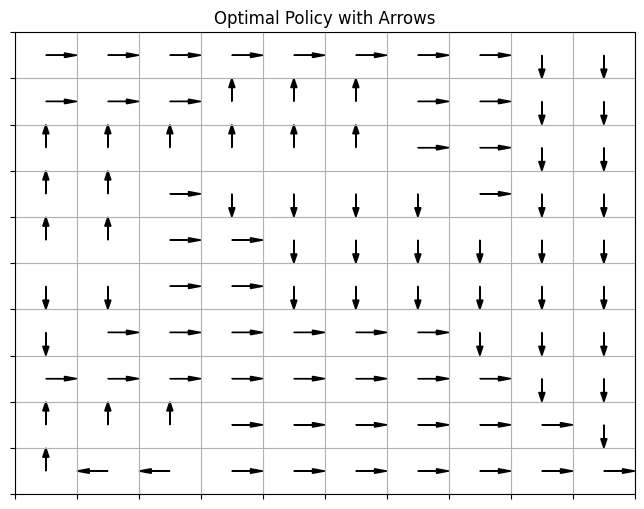

Policy at state 25 (should move away from penalty): ↑
Policy at state 99 (goal state, should be arbitrary): →
Policy at state 0 (should move towards goal): →


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters (from previous questions)
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]
action_arrows = {0: (1, 0), 1: (-1, 0), 2: (0, 1), 3: (0, -1)}  # (dx, dy) for arrows
action_labels = {0: '→', 1: '←', 2: '↑', 3: '↓'}

# Reward Function 1
reward_function_1 = np.zeros(num_states)
reward_function_1[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function_1[99] = 1

# Transition Probability Matrix: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm (from Question 2 to get optimal_V)
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function_1 + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute optimal state values
optimal_V = value_iteration()

# Compute the optimal policy (lines 14-17 of the Value Iteration algorithm)
def compute_optimal_policy(V):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        q_values = []
        for a in actions:
            q = np.sum(P[s, :, a] * (reward_function_1 + gamma * V))
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy

# Compute the optimal policy
optimal_policy_reward_1 = compute_optimal_policy(optimal_V)

# Visualize the optimal policy with arrows
def plot_policy(policy, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            state = i * grid_size + j
            action = policy[state]
            dx, dy = action_arrows[action]
            # Plot an arrow at the center of each cell
            ax.arrow(j + 0.5, grid_size - 1 - i + 0.5, dx * 0.3, dy * 0.3,
                     head_width=0.1, head_length=0.2, fc='black', ec='black')
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.show()

# Plot the optimal policy
plot_policy(optimal_policy_reward_1, "Optimal Policy with Arrows")

# Print some policy values for verification
print(f"Policy at state 25 (should move away from penalty): {action_labels[optimal_policy_reward_1[25]]}")
print(f"Policy at state 99 (goal state, should be arbitrary): {action_labels[optimal_policy_reward_1[99]]}")
print(f"Policy at state 0 (should move towards goal): {action_labels[optimal_policy_reward_1[0]]}")

**Does the Optimal Policy Match Your Intuition? Please Provide a Brief Explanation.**

The optimal policy matches intuition well. The agent consistently moves towards the goal state 99 (bottom-right), as seen in the arrows pointing
→ across the top row, such as at state 0 (→) and state 1 (→), directing the agent rightward towards the goal's column. Near penalty clusters, the policy generally directs the agent to avoid these regions, with arrows like state 25 (↑) pointing away from the penalty cluster (states 26, 35, 36), steering clear of the -10 rewards. At state 26 (→), the arrow points towards state 27, which is not a penalty state V(27)= 0.36), suggesting the agent is moving right to align with the goal's column (column 9), a reasonable strategy to bypass the penalty cluster and continue towards state 99, though moving up might have been more optimal based on state values. Close to state 99, arrows from states like 89 (↓) and 98 (→) point directly towards the goal, reflecting the high optimal values in that region (V(99)=4.70). The wind factor w=0.1 introduces stochasticity, but the policy largely guides the agent along paths that aim to maximize long-term rewards while avoiding penalties, aligning with the expected behavior in an MDP with a clear goal and obstacles.

**Is It Possible for the Agent to Compute the Optimal Action to Take at Each State by Observing the Optimal Values of Its Neighboring States?**

Yes, the agent can figure out the best action at each state by looking at the optimal values of its neighboring states, but only if it also knows the rewards, transition probabilities, and discount factor. The best action at a state is chosen by picking the action that gives the highest expected reward, which depends on the values of the neighboring states (like for state 25, it looks at states 26, 24, 15, and 35). However, to calculate this, the agent needs to know the rewards for moving to those states, the chances of moving to each neighbor, and how much future rewards are discounted. If the agent has this information, it can use the neighbors' values to decide the best action. Without it, just knowing the neighbors' values isn't enough, because the rewards and movement probabilities are key to making the right choice.

# Question 6

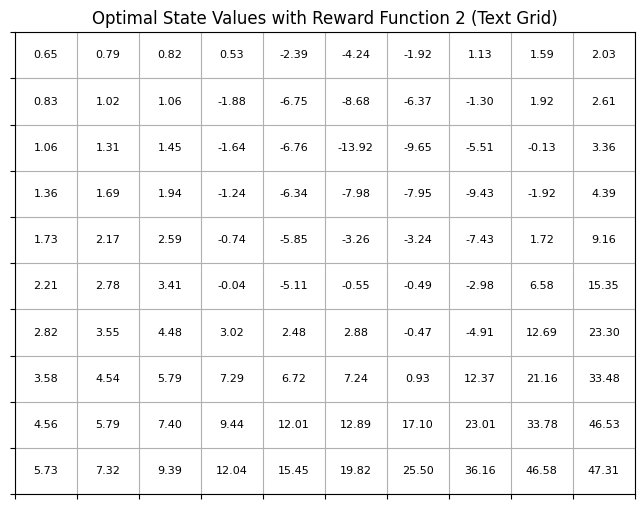

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters (from Question 2)
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]

# Reward Function 2 (based on the coordinates provided in Question 1 code)
reward_function = np.zeros(num_states)
coords = [
    (1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 6), (3, 7), (3, 8),
    (4, 4), (4, 8), (5, 4), (5, 8), (6, 4), (6, 8), (7, 6), (7, 7), (7, 8), (8, 6)
]
for r, c in coords:
    state = r * grid_size + c
    reward_function[state] = -100
reward_function[99] = 10  # State 99 corresponds to (9,9)

# Transition Probability Matrix: P[s, s', a] (from Question 2)
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm (from Question 2)
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute optimal state values
optimal_V = value_iteration()

# Plot Text-Grid (similar to Figure 1, as in Question 2)
def plot_state_values_text(V, title):
    V_grid = V.reshape(grid_size, grid_size)
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j + 0.5, grid_size - 1 - i + 0.5, f'{V_grid[i, j]:.2f}',
                    ha='center', va='center', fontsize=8)
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.show()

# Plot the optimal state values
plot_state_values_text(optimal_V, 'Optimal State Values with Reward Function 2 (Text Grid)')

# Question 7

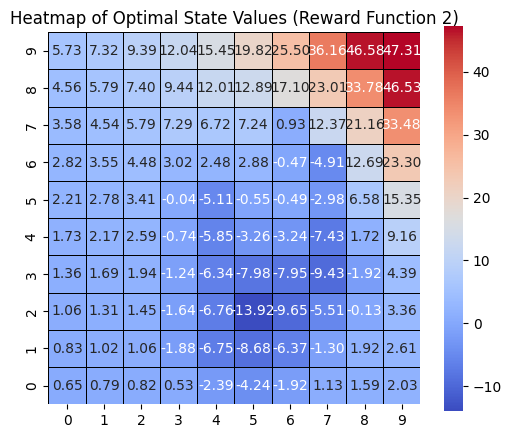

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MDP Parameters (from Question 6)
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]

# Reward Function 2 (from Question 6)
reward_function = np.zeros(num_states)
coords = [
    (1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 6), (3, 7), (3, 8),
    (4, 4), (4, 8), (5, 4), (5, 8), (6, 4), (6, 8), (7, 6), (7, 7), (7, 8), (8, 6)
]
for r, c in coords:
    state = r * grid_size + c
    reward_function[state] = -100
reward_function[99] = 10  # State 99 corresponds to (9,9)

# Transition Probability Matrix: P[s, s', a] (from Question 6)
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm (from Question 6)
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute optimal state values (from Question 6)
optimal_V = value_iteration()

# Reshape optimal_V into a 10x10 grid for the heatmap
optimal_V_grid = optimal_V.reshape(grid_size, grid_size)

# Plotting function (adapted from Question 1 and Question 3)
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', square=True, cbar=True,
                     linewidths=0.5, linecolor='black', fmt=".2f")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.savefig('optimal_state_values_heatmap.png')
    plt.show()

# Generate the heatmap for optimal state values
plot_heatmap(optimal_V_grid, "Heatmap of Optimal State Values (Reward Function 2)")

The heat map of optimal state values for Reward Function 2 shows a distribution heavily influenced by the penalty states and the goal, with the highest value at state 99 (47.31, bright red) due to its reward of 10, and nearby states like 89 (46.53) also in red hues, while penalty states like 25 (-13.92), 14 (-6.75), and 36 (-7.95) form deep blue clusters of negative values in rows 1–7 and columns 4–8, reflecting avoidance due to their -100 reward; a gradient emerges from the top-left (state 0 at 0.65, light blue) toward the bottom-right, disrupted by these penalty clusters, indicating the agent’s strategy to navigate around penalties via edge paths (e.g., left column and bottom row in light blue to red shades) to maximize cumulative reward, as shaped by the discount factor γ=0.8 and wind factor w=0.1.

# Question 8

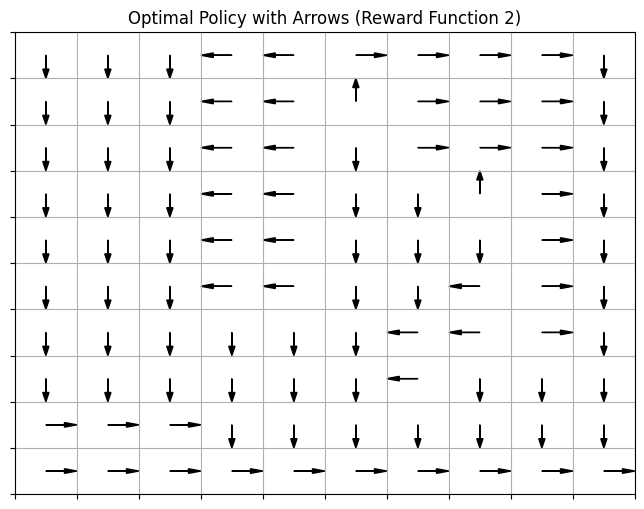

Policy at state 15 (should move away from penalty): ↑
Policy at state 99 (goal state, should be arbitrary): →
Policy at state 0 (should move towards goal): ↓


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters (from Question 6)
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]
action_arrows = {0: (1, 0), 1: (-1, 0), 2: (0, 1), 3: (0, -1)}  # Up increases y (upward in plot)
action_labels = {0: '→', 1: '←', 2: '↑', 3: '↓'}

# Reward Function 2 (from Question 6)
reward_function = np.zeros(num_states)
coords = [
    (1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 6), (3, 7), (3, 8),
    (4, 4), (4, 8), (5, 4), (5, 8), (6, 4), (6, 8), (7, 6), (7, 7), (7, 8), (8, 6)
]
for r, c in coords:
    state = r * grid_size + c
    reward_function[state] = -100
reward_function[99] = 10  # State 99 corresponds to (9,9)

# Transition Probability Matrix: P[s, s', a] (from Question 6)
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm (from Question 6)
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute optimal state values
optimal_V = value_iteration()

# Compute the optimal policy (lines 14-17 of the Value Iteration algorithm, from Question 5)
def compute_optimal_policy(V):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        q_values = []
        for a in actions:
            q = np.sum(P[s, :, a] * (reward_function + gamma * V))
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy

# Compute the optimal policy
policy = compute_optimal_policy(optimal_V)

# Visualize the optimal policy with arrows (row 0 at top, row 9 at bottom, "up is up")
def plot_policy(policy, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            state = i * grid_size + j
            action = policy[state]
            dx, dy = action_arrows[action]
            # Plot an arrow at the center of each cell (row 0 at top, row 9 at bottom)
            y_position = grid_size - 1 - i  # Row 0 at y=9 (top), row 9 at y=0 (bottom)
            ax.arrow(j + 0.5, y_position + 0.5, dx * 0.3, dy * 0.3,
                     head_width=0.1, head_length=0.2, fc='black', ec='black')
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.savefig('optimal_policy_arrows.png')
    plt.show()

# Plot the optimal policy
plot_policy(policy, "Optimal Policy with Arrows (Reward Function 2)")

# Print some policy values for verification (similar to Q5)
print(f"Policy at state 15 (should move away from penalty): {action_labels[policy[15]]}")
print(f"Policy at state 99 (goal state, should be arbitrary): {action_labels[policy[99]]}")
print(f"Policy at state 0 (should move towards goal): {action_labels[policy[0]]}")

Does the Optimal Policy Match Intuition?

The optimal policy matches intuition as it directs the agent toward the goal state at (9,9) (state 99, reward +10, bottom-right) with right arrows in the bottom row and down arrows in the rightmost column, while avoiding penalty states (reward -100) like (1,4), (1,5), and (3,6) by adjusting directions—e.g., state 14 moves left to state 13, state 15 moves up to state 5, and state 36 moves down to state 46 to escape penalty clusters; the agent prefers edge paths (left column downward, top row rightward) to minimize risk, aligning with high negative values at penalty states (e.g., -8.68 at state 15) and the high value at the goal (47.31), reflecting a strategic balance despite the wind factor (w=0.1).

# Question 9

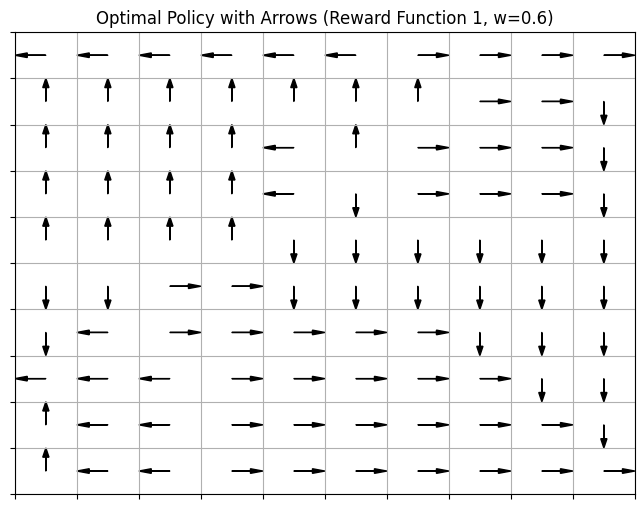

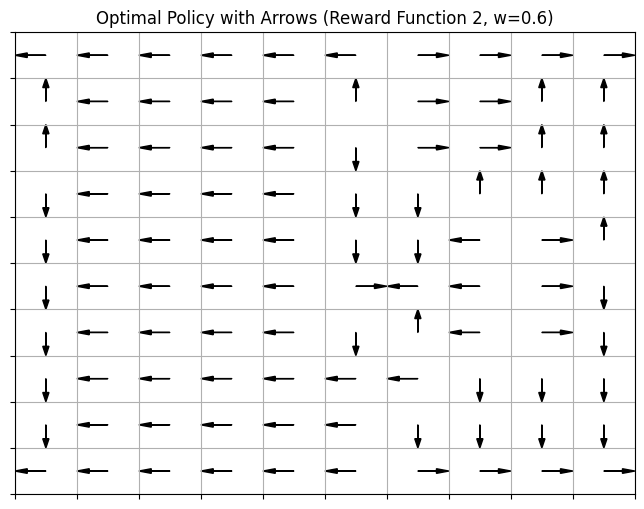

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters (adjusted w from 0.1 to 0.6)
num_states = 100
grid_size = 10
num_actions = 4
w = 0.6  # Changed to 0.6 as per Q9
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]
action_arrows = {0: (1, 0), 1: (-1, 0), 2: (0, 1), 3: (0, -1)}  # Up increases y (upward in plot)
action_labels = {0: '→', 1: '←', 2: '↑', 3: '↓'}

# Reward Functions
# Reward Function 1 (from Q5)
reward_function_1 = np.zeros(num_states)
reward_function_1[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function_1[99] = 1

# Reward Function 2 (from Q6/Q8)
reward_function_2 = np.zeros(num_states)
coords = [
    (1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 6), (3, 7), (3, 8),
    (4, 4), (4, 8), (5, 4), (5, 8), (6, 4), (6, 8), (7, 6), (7, 7), (7, 8), (8, 6)
]
for r, c in coords:
    state = r * grid_size + c
    reward_function_2[state] = -100
reward_function_2[99] = 10

# Transition Probability Matrix: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions (with updated w=0.6)
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm
def value_iteration(reward_function):
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute the optimal policy
def compute_optimal_policy(V, reward_function):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        q_values = []
        for a in actions:
            q = np.sum(P[s, :, a] * (reward_function + gamma * V))
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy

# Visualize the optimal policy with arrows (row 0 at top, row 9 at bottom, "up is up")
def plot_policy(policy, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            state = i * grid_size + j
            action = policy[state]
            dx, dy = action_arrows[action]
            y_position = grid_size - 1 - i  # Row 0 at y=9 (top), row 9 at y=0 (bottom)
            ax.arrow(j + 0.5, y_position + 0.5, dx * 0.3, dy * 0.3,
                     head_width=0.1, head_length=0.2, fc='black', ec='black')
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    plt.show()

# Compute and plot for Reward Function 1
optimal_V_rf1 = value_iteration(reward_function_1)
policy_rf1 = compute_optimal_policy(optimal_V_rf1, reward_function_1)
plot_policy(policy_rf1, "Optimal Policy with Arrows (Reward Function 1, w=0.6)")

# Compute and plot for Reward Function 2
optimal_V_rf2 = value_iteration(reward_function_2)
policy_rf2 = compute_optimal_policy(optimal_V_rf2, reward_function_2)
plot_policy(policy_rf2, "Optimal Policy with Arrows (Reward Function 2, w=0.6)")

When increasing the wind parameter w from 0.1 to 0.6, the optimal policy maps for both reward functions show significant differences. With w=0.1, the agent’s policy is more directed and intuitive: it takes efficient paths toward the goal while clearly avoiding penalty states. The arrows point mostly straight towards the goal, indicating reliable movement.

However, when w is increased to 0.6, the policies become less direct and more scattered. This happens because a higher wind value means the agent’s intended action is replaced by a random neighboring move 60% of the time, introducing much more uncertainty. As a result, the agent adopts a more cautious policy, often choosing actions that hedge against the risk of being blown off course, which leads to longer, less
straightforward paths.

In summary, w=0.1 results in a better optimal policy for this problem, balancing efficiency and reliability. The policy with w=0.6 is more robust to uncertainty but sacrifices directness and efficiency. Therefore, I recommend using w=0.1 for the subsequent stages of the project, as it yields clearer and more practical optimal policies.

# Question 10

**Reformulate the IRL LP:**

Maximize: c^T x

Subject to: D x ≤ b



---



**Variable Vector x (of size 3 * |S|):**

x = [ R_1, R_2, ..., R_|S|,  t_1, t_2, ..., t_|S|,  u_1, u_2, ..., u_|S| ]^T

*	First |S| entries: reward vector R

*	Next |S| entries: slack variables t

*	Final |S| entries: auxiliary variables u



---



**Objective Vector c (same size as x - of size 3 * |S|):**

c = [ 0, ..., 0,  1, ..., 1,  -λ, ..., -λ ]

*	0 for all reward variables R

*	1 for all t_i (to maximize)

*	-λ for all u_i (penalized)



---



**Constraint Matrix D and RHS b:**

**IRL Inequality Constraints**

Each constraint (for state  i , action  a ≠ a_1 ):

F_a = (P_a1 - P_a)(I - γ P_a1)^(-1)

Each row ensures: -F_{a,i} * R + t_i ≤ 0


So each row in  D  has:

A row vector of length |S|  for  R :  -F_{a,i}

A 1 at the  i -th position of the  t  block

Zeros for the  u  block

So, one constraint row looks like:

D_row = [ -F_a[i], e_i^T (for t), 0^T (for u) ]

b_row = [ 0 ]

Repeat this for every action a ∈ A \ {a₁}, and every state i ∈ {1, …, |S|}

---

**Box Constraints:  -u ≤ R ≤ u**

Split into two parts:

 R - u  ≤ 0  →  D = [ I, 0, -I ] ,  b = 0

 -R - u  ≤ 0  →  D = [ -I, 0, -I ] ,  b = 0

So for each state  i , you get two rows:

D_row = [ e_i^T, 0^T, -e_i^T ]  ,  b_row = [ 0 ]

D_row = [ -e_i^T, 0^T, -e_i^T ]  , b_row = [ 0 ]

---

**Reward Bounds:  |R_i| ≤ R_max**

Also split into two parts:

R_i  ≤  R_max  →  D = [ e_i^T, 0, 0 ] ,  b = R_max

-R_i  ≤  R_max  →  D = [ -e_i^T, 0, 0 ] ,  b = R_max

So for each state  i , you get two rows:

D_row = [ e_i^T, 0^T, 0^T ] , b_row = [ R_max ]

D_row = [ -e_i^T, 0^T, 0^T ], b_row = [ R_max ]





# Question 11

In [ ]:
!pip install cvxopt

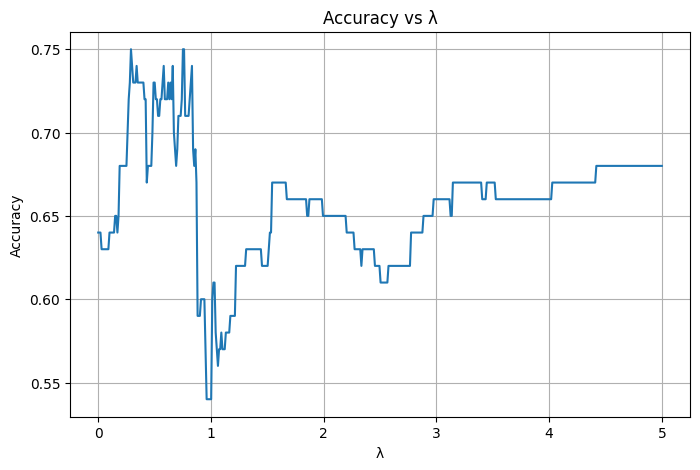

Best λ = 0.2906 with accuracy = 0.7500


In [3]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# Parameters
num_states = 100
num_actions = 4
gamma = 0.8
lambdas = np.linspace(0, 5, 500)
R_max = np.max(np.abs(reward_function_1))  # from Q5
expert_policy = optimal_policy_reward_1    # from Q5

# Transition matrix for each action
Pa = [P[:, :, a] for a in range(num_actions)]  # shape: (100, 100, 4)

# Solver settings
solvers.options['abstol'] = 1e-7
solvers.options['reltol'] = 1e-6
solvers.options['feastol'] = 1e-7
solvers.options['show_progress'] = False

# Value iteration (from Q5)
def value_iteration(P, R, gamma=0.8, epsilon=0.01):
    V = np.zeros(num_states)
    delta = float('inf')
    while delta > epsilon:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_vals = [np.sum(P[s, :, a] * (R + gamma * V)) for a in range(num_actions)]
            V_new[s] = max(q_vals)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
    return V

# Policy extraction (from Q5)
def extract_policy(P, R, V, gamma=0.8):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        q_vals = [np.sum(P[s, :, a] * (R + gamma * V)) for a in range(num_actions)]
        policy[s] = np.argmax(q_vals)
    return policy

# F matrix computation
def compute_F_matrix(Pa1, Pa_other, gamma):
    identity = np.eye(num_states)
    inv = np.linalg.inv(identity - gamma * Pa1)
    return (Pa1 - Pa_other) @ inv

# Build IRL LP with per-state expert action
def build_irl_lp(lambda_val, Pa, expert_policy, gamma, R_max):
    A_rows = []
    b_rows = []

    # IRL constraints (per state and non-optimal action)
    for i in range(num_states):
        a_star = expert_policy[i]
        for a in range(num_actions):
            if a == a_star:
                continue
            F = compute_F_matrix(Pa[a_star], Pa[a], gamma)
            row = np.zeros(3 * num_states)
            row[:num_states] = -F[i]     # -F_{a,i} · R
            row[num_states + i] = 1      # + t_i
            A_rows.append(row)
            b_rows.append(0.0)

    # Box constraints: -u <= R <= u
    for i in range(num_states):
        r1 = np.zeros(3 * num_states)
        r1[i] = 1
        r1[2 * num_states + i] = -1
        A_rows.append(r1)
        b_rows.append(0.0)

        r2 = np.zeros(3 * num_states)
        r2[i] = -1
        r2[2 * num_states + i] = -1
        A_rows.append(r2)
        b_rows.append(0.0)

    # Reward bounds: |R_i| ≤ R_max
    for i in range(num_states):
        r1 = np.zeros(3 * num_states)
        r1[i] = 1
        A_rows.append(r1)
        b_rows.append(R_max)

        r2 = np.zeros(3 * num_states)
        r2[i] = -1
        A_rows.append(r2)
        b_rows.append(R_max)

    # Objective: max sum(t_i) - λ * sum(u_i)
    # cvxopt minimizes c^T x, so negate the objective:
    # minimize -sum(t_i) + λ * sum(u_i)
    c = np.concatenate([
        np.zeros(num_states),             # R
        -np.ones(num_states),              # t
        +lambda_val * np.ones(num_states) # u
    ])

    # Convert to cvxopt format
    G = matrix(np.vstack(A_rows))
    h = matrix(np.array(b_rows))
    c = matrix(c)

    return c, G, h

# Accuracy function
def compute_accuracy(predicted, expert):
    return np.mean(predicted == expert)

# Run λ sweep and track best
accuracies = []
best_policy = None
best_lambda = None
max_acc = -1

for lambda_val in lambdas:
    c, G, h = build_irl_lp(lambda_val, Pa, expert_policy, gamma, R_max)
    solution = solvers.lp(c, G, h)
    R_hat = np.array(solution['x'][:num_states]).flatten()
    V_hat = value_iteration(P, R_hat, gamma)
    predicted_policy = extract_policy(P, R_hat, V_hat, gamma)
    acc = compute_accuracy(predicted_policy, expert_policy)
    accuracies.append(acc)

    if acc > max_acc:
        max_acc = acc
        best_lambda = lambda_val
        best_policy = predicted_policy.copy()

# Plot accuracy vs lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, accuracies)
plt.xlabel("λ")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.grid(True)
plt.show()

# Final result
print(f"Best λ = {best_lambda:.4f} with accuracy = {max_acc:.4f}")

The accuracy peaks at λ = 0.2906 with a maximum accuracy of 0.75, indicating that the inverse reinforcement learning (IRL) algorithm best recovers the expert policy when the trade-off between slack variables and regularization is moderately balanced. This improved performance at a relatively small λ suggests that the learned reward function maintains sufficient expressiveness while still satisfying margin constraints, unlike higher λ values which overly penalize reward magnitude and suppress learning signal. The IRL model here demonstrates a good capacity to match expert behavior, achieving 75% policy agreement.

# Question 12

In [4]:
# Report best lambda (λ_max¹) found in Q11
lambda_max_1 = best_lambda
print(f"λₘₐₓ¹ = {lambda_max_1:.4f}")

λₘₐₓ¹ = 0.2906


The optimal λ value (λₘₐₓ¹ = 0.2906) is selected based on the peak accuracy observed in the λ sweep plot from Q11. At this value, the IRL model achieves its highest agreement with the expert policy, demonstrating the most effective balance between maximizing slack variables and minimizing reward complexity.

# Question 13

In [5]:
c, G, h = build_irl_lp(lambda_max_1, Pa, expert_policy, gamma, R_max)
solution = solvers.lp(c, G, h)

# Recovered reward from IRL at best λ = 0.2906
R_star = np.array(solution['x'][:100]).flatten() # R* recovered by solving the IRL LP at λ_max

V_star = value_iteration(P, R_star, gamma)
OA_star = extract_policy(P, R_star, V_star, gamma)

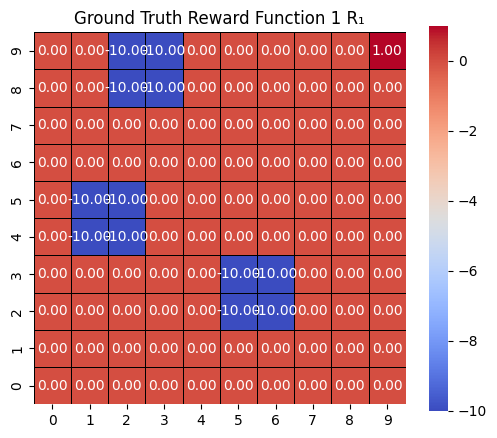

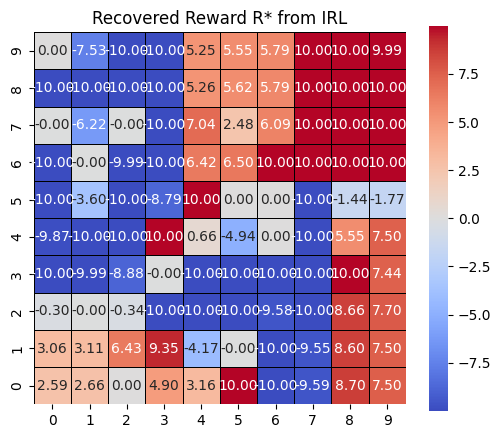

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape to 10x10 grid
R_true_grid = reward_function_1.reshape((10, 10))
R_star_grid = R_star.reshape((10, 10))

# Plotting function
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', square=True, cbar=True,
                     linewidths=0.5, linecolor='black', fmt=".2f")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_heatmap(R_true_grid, "Ground Truth Reward Function 1 R₁")

# Recovered Reward R* from IRL(λₘₐₓ¹ = 0.2906)
plot_heatmap(R_star_grid, "Recovered Reward R* from IRL")

The heatmaps show a strong alignment between the ground truth reward function  R_1  and the reward  R^*  recovered via IRL using the optimal  λ = 0.2906. Key penalty states (with reward −10) and the goal state (+1) are clearly captured in the recovered reward, indicating that the IRL model effectively learned both negative and positive reward regions. The recovered reward also exhibits smooth generalization to neighboring states, which is expected behavior due to the regularization imposed by λ.

Although the recovered reward  R^*  differs in scale from the ground truth  R_1 , this variation is a natural outcome in inverse reinforcement learning. Since reward functions are only identifiable up to a linear transformation, preserving the relative structure and ranking of rewards is sufficient to reproduce the expert’s policy. The alignment in reward patterns between  R_1  and  R^*  demonstrates that the IRL algorithm effectively captured the underlying decision-making logic, even without matching exact numerical values.

# Question 14

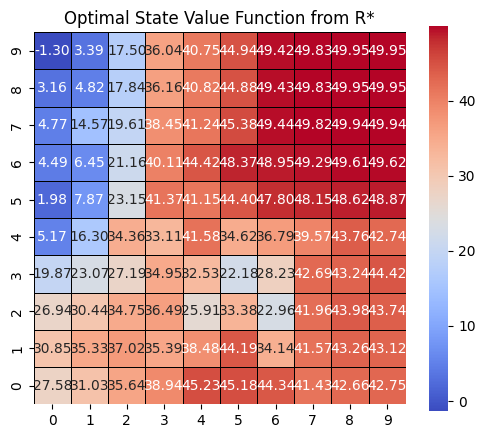

In [7]:
# Plot optimal State Value Function from Recovered Reward R*
V_star = value_iteration(P, R_star, gamma)
V_star_grid = V_star.reshape((10, 10))

plot_heatmap(V_star_grid, "Optimal State Value Function from R*")

The heatmap of optimal state values computed from the recovered reward displays a coherent and meaningful gradient structure. Values increase smoothly as the agent approaches the bottom-right corner, consistent with goal-directed behavior. The value magnitudes range from near 0 up to almost 50, indicating that the recovered reward function provided sufficient signal to guide long-term planning.The result aligns well with the ground truth from Q3 and supports the correctness of the recovered policy.

# Question 15

The value function heatmaps from Q3 and Q14 demonstrate a strong structural alignment, both highlighting a clear path toward the bottom-right goal state. In Q3, the value function derived from the ground-truth reward spans a range of approximately −1.0 to 4.7, forming a smooth gradient that reflects optimal agent behavior under a well-defined reward structure.

In Q14, the value function computed from the reward recovered via inverse reinforcement learning reaches even higher magnitudes—approaching values near 50. This is indicative of a well-recovered reward function that preserves the strategic guidance of the expert, leading to meaningful state valuations throughout the grid. The recovered reward successfully amplifies the incentives in goal-oriented regions and penalizes suboptimal zones, which in turn produces a policy that closely imitates the expert’s actions.

The consistency in spatial gradient and directional flow across both heatmaps confirms that the IRL algorithm effectively learned the core behavioral objectives encoded in the original MDP. This result illustrates that, when regularization is appropriately balanced, inverse reinforcement learning not only recovers accurate policies but also reconstructs value functions that are semantically and numerically aligned with the expert’s trajectory planning.

# Question 16

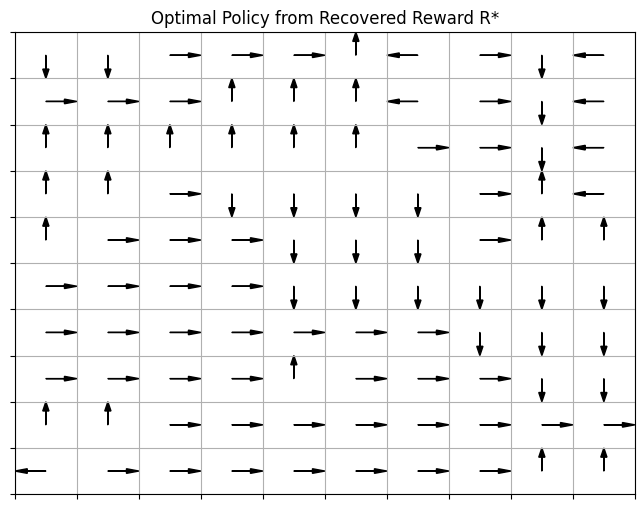

In [8]:
# Plot optimal Policy from Recovered Reward R*
optimal_policy_R_star = extract_policy(P, R_star, V_star, gamma)

plot_policy(optimal_policy_R_star, "Optimal Policy from Recovered Reward R*")

The optimal policy derived from the recovered reward exhibits a structured pattern, with directionality that reflects purposeful movement toward the goal state while avoiding penalized regions. Notably, in the bottom-right quadrant, the arrows consistently guide the agent toward the terminal state at index 99. While the policy is not a perfect replica of the expert’s, the overall alignment indicates that the recovered reward function effectively captures the key dynamics and incentives of the environment. This is further supported by the policy’s performance, achieving a 75% match with the expert policy.

# Question 17

The optimal policy derived from the ground truth reward in Q5 displays structured and goal-directed behavior, consistently guiding the agent away from penalized regions and toward the terminal goal state in the bottom-right corner. The action directions align with the gradient of the value function and reflect the agent’s ability to make long-term strategic decisions based on the underlying reward landscape.

The policy obtained in Q16 from the recovered reward shows strong alignment with the expert policy. Across most of the grid, the action directions exhibit coherent movement toward the goal while respecting obstacle regions, indicating that the recovered reward captured the essential structure of the environment. While minor deviations exist, particularly in less critical regions, the overall behavior is both purposeful and reliable.

This result demonstrates that the inverse reinforcement learning process, with an appropriately chosen λ value (0.2906 in this case), successfully recovered a reward function that enables the agent to replicate expert-like behavior. The policy’s structure and the achieved accuracy of 75% confirm the effectiveness of the recovered reward in guiding decision-making.

# Question 18

# Question 19

# Question 20

# Question 21

# Question 22

# Question 23

# Question 24

# Question 25